In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill: ast.literal_eval(skill)if pd.notna(skill)else skill)

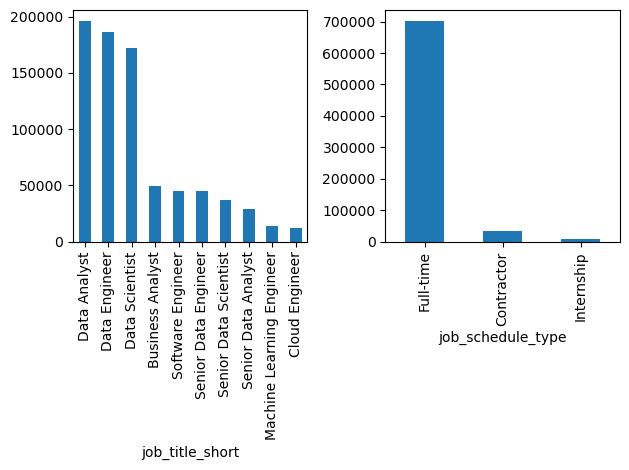

In [3]:
fig , axx = plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar',ax=axx[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar',ax=axx[1])
fig.tight_layout()


In [4]:
df_expoled=df.explode('job_skills').copy()
skill_count=df_expoled.groupby(by=['job_title_short','job_skills']).size()
df_skill_count=skill_count.reset_index(name='count')
df_skill_count=df_skill_count.sort_values('count',ascending=False)
df_skill_count

,job_title_short,job_skills,count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


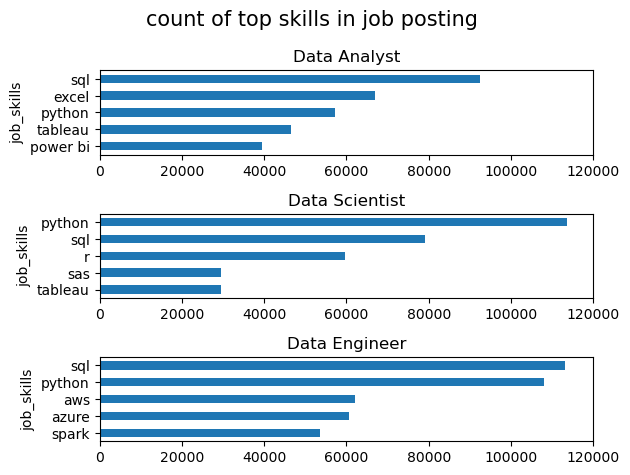

In [7]:
fig, axx=plt.subplots(3,1)
job_titles=['Data Analyst','Data Scientist','Data Engineer']
for i,job_title in enumerate(job_titles):
    df_plot= df_skill_count[df_skill_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='count',ax=axx[i],title=job_title)
    axx[i].invert_yaxis()
    axx[i].legend().set_visible(False)
    axx[i].set_xlim(0,120000)
fig.suptitle('count of top skills in job posting ',fontsize=15)    
fig.tight_layout()    